In [16]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from utils import rayleigh_function, get_surface_data

In [17]:
# the wavelengths
X = np.linspace(0.41, 2.35, 10000)

sun_transmission = get_surface_data(["data/cold_sun.csv"], X)[0]

# get earth transmission to surface 
earth_transmission_path = "data/Earth_Sun0.875_Surface"
wavelength, albedo = np.genfromtxt(earth_transmission_path, dtype=None, unpack=True)

earth_interp = interp1d(wavelength, albedo)
earth_transmission = earth_interp(X)*sun_transmission

In [6]:
# data from: https://pubs.usgs.gov/of/2003/ofr-03-395/datatable.html
melting_snowpaths = {'mSnw1a':'data/melting_snow_1-16.9366.asc',
                     'mSnw3' :'data/melting_snow_1-16.9412.asc',
                     'mSnw4' :'data/melting_snow_1-16.9457.asc',
                     'mSnw5' :'data/melting_snow_1-16.9480.asc',
                     'mSnw8' :'data/melting_snow_1-16.9504.asc',
                     'mSnw9' :'data/melting_snow_1-16.9551.asc',
                     'mSnw12':'data/melting_snow_1-16.9224.asc',
                     'mSnw14':'data/melting_snow_1-16.9247.asc',
                     'mSnw15':'data/melting_snow_1-16.9271.asc',
                     'mSnw16':'data/melting_snow_1-16.9296.asc',
                     'seawater':'data/seawater_open_ocean_sw2.9627.asc'}

In [10]:
melting_snow_data = get_surface_data(melting_snowpaths.values(), X)

/mnt/g/Documents/KalteneggerWater/utils.py:57: ConversionWarning: Some errors were detected !
    Line #2100 (got 1 columns instead of 3)
    Line #2101 (got 1 columns instead of 3)
    Line #2102 (got 1 columns instead of 3)
    Line #2103 (got 1 columns instead of 3)
    Line #2104 (got 1 columns instead of 3)
    Line #2105 (got 1 columns instead of 3)
    Line #2106 (got 1 columns instead of 3)
    Line #2107 (got 1 columns instead of 3)
    Line #2108 (got 1 columns instead of 3)
    Line #2109 (got 1 columns instead of 3)
    Line #2110 (got 1 columns instead of 3)
    Line #2111 (got 1 columns instead of 3)
    Line #2112 (got 1 columns instead of 3)
    Line #2113 (got 1 columns instead of 3)
    Line #2114 (got 1 columns instead of 3)
    Line #2115 (got 1 columns instead of 3)
    Line #2116 (got 1 columns instead of 3)
    Line #2117 (got 1 columns instead of 3)
    Line #2118 (got 1 columns instead of 3)
    Line #2119 (got 1 columns instead of 3)
    Line #2120 (got 1 colu

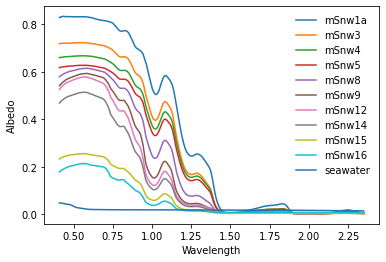

In [11]:
for i, surface_name in enumerate(melting_snowpaths.keys()):
    plt.plot(X, melting_snow_data[i,:], label=surface_name)
plt.xlabel('Wavelength')
plt.ylabel('Albedo')
plt.legend(frameon=False)

NameError: name 'snow_albedo' is not defined

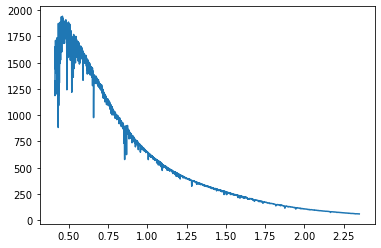

In [18]:
plt.plot(X, sun_transmission, label="star")
plt.plot(X, earth_transmission*snow_albedo, label='without Rayleigh')
plt.plot(X, earth_transmission*snow_albedo + rayleigh_function(X, sun_transmission, p=1), label='with Rayleigh')
plt.title("snow surface")
plt.legend()

In [ ]:
plt.plot(X, sun_transmission, label="star")
plt.plot(X, earth_transmission*cloud_albedo + rayleigh_function(X, sun_transmission, p=1), label='cloud')
plt.plot(X, earth_transmission*snow_albedo + rayleigh_function(X, sun_transmission, p=1), label='snow')
plt.title("snow surface")
plt.legend()